In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib qt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from IPython.display import display, Math

#matplotlib.use('Agg')

rcParams["axes.labelsize"] = '19'
rcParams["axes.titlesize"] = '15'
rcParams["axes.linewidth"] = '0.5'
rcParams["font.size"] = '7'
rcParams["xtick.labelsize"] = '15'
rcParams["ytick.labelsize"] = '15'
rcParams["xtick.major.width"] = '0.5'
rcParams["ytick.major.width"] = '0.5'
rcParams["xtick.major.size"] = '3'
rcParams["ytick.major.size"] = '3'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["xtick.major.pad"] = '5'
rcParams["ytick.major.pad"] = '5'
rcParams["axes.labelpad"] = '10'
rcParams["axes.grid"] = 'True'
rcParams["xtick.top"] = 'True'
rcParams["ytick.right"] = 'True'

         
rcParams['font.sans-serif'] = 'Arial'         
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'serif'

rcParams['pdf.fonttype'] = '42'

In [2]:
h = 6.62607015e-34 # Planck's constant codata
c = 299792458 # speed of light in vacuum
ϵ0 = 8.8541878128e-12 # vacuum permittivity in C^2⋅N^−1⋅m^−2 codata
μ0 = 4*np.pi*1e-7 # vacuum permeability
ħ = h/(2*np.pi) # reduced Planck's const
kB = 1.380649e-23 # Boltzman's const codata value codata
u = 1.66053906660e-27 # atomic mass unit in kg codata
e = 1.602176634e-19 # elementary charge in Coulomb (NIST codata)
N_A = 6.02214076e23 # Avogadro's number codata
m_e = 9.1093837015e-31 # codata value (https://physics.nist.gov/cgi-bin/cuu/Value?me)
m_p = 1.67262192369e-27 # codata value of proton mass

# Transition wavelength of Sr I (neutral Strontium) from NIST data

https://physics.nist.gov/PhysRefData/Handbook/Tables/strontiumtable5.htm

## 5s$^2$ $^1$S$_0$ $\rightarrow$ 5s5p $^1$P$_1$; blue MOT transition

In [3]:
level = 21698.482 # cm^-1
lamb = 1/(level)
ν = c/(lamb*10**-2) # in Hz
print('λ = '+str(lamb*10**7)+' nm') # nm
print('ν = '+str(ν/10**12)+' THz')

λ = 460.8617321709417 nm
ν = 650.5041253648757 THz


## 5s$^2$ $^1$S$_0$ $\rightarrow$ 5s5p $^3$P$_0$; clock transition

In [4]:
level = 14317.520 # cm^-1
lamb = 1/(level)
ν = c/(lamb*10**-2) # in Hz
print('λ = '+str(lamb*10**7)+' nm') # nm
print('ν = '+str(ν/10**12)+' THz')

λ = 698.4449820918705 nm
ν = 429.228451326416 THz


## 5s$^2$ $^1$S$_0$ $\rightarrow$ 5s5p $^3$P$_1$; red MOT transition

In [5]:
level = 14504.351 # cm^-1
lamb = 1/(level)
ν = c/(lamb*10**-2) # in Hz
print('λ = '+str(lamb*10**7)+' nm') # nm
print('ν = '+str(ν/10**12)+' THz')

λ = 689.4482903785216 nm
ν = 434.82950379847574 THz


## 5s$^2$ $^1$S$_0$ $\rightarrow$ 5s5p $^3$P$_2$

In [6]:
level = 14898.563 # cm^-1
lamb = 1/(level)
ν = c/(lamb*10**-2) # in Hz
print('λ = '+str(lamb*10**7)+' nm') # nm
print('ν = '+str(ν/10**12)+' THz')

λ = 671.2056726544702 nm
ν = 446.64768224378537 THz


## 5s5p $^3$P$_2$ $\rightarrow$ 5s6s $^3$S$_1$   repumper 1

In [7]:
level3p2 = 14898.563 # cm^-1
level3s1 = 29038.795 # cm^-1

level = level3s1 - level3p2 # cm^-1
lamb = 1/(level)
ν = c/(lamb*10**-2) # in Hz
print('λ = '+str(lamb*10**7)+' nm') # nm
print('ν = '+str(ν/10**12)+' THz')

λ = 707.2019751868287 nm
ν = 423.9134907970256 THz


## 5s5p $^3$P$_0$ $\rightarrow$ 5s6s $^3$S$_1$   repumper 2

In [8]:
level3p0 = 14317.520 # cm^-1
level3s1 = 29038.795 # cm^-1

level = level3s1 - level3p0 # cm^-1
lamb = 1/(level)
ν = c/(lamb*10**-2) # in Hz
print('λ = '+str(lamb*10**7)+' nm') # nm
print('ν = '+str(ν/10**12)+' THz')

λ = 679.2889882160345 nm
ν = 441.3327217143949 THz


## 5s5p $^3$P$_0$ $\rightarrow$ 5s6d $^3$D$_1$   repumper 3    494nm

In [9]:
λ_394 = 394*1e-9
ν_394 = c/λ_394
print('ν_394 = ', ν_394/1e12, 'THz')

ν_394 =  760.8945634517767 THz


## Energy to wavelength conversion

In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Constants
h = 6.62607015e-34  # Planck's constant in J·s
c = 299792458       # Speed of light in m/s
eV = 1.602e-19      # Conversion factor from eV to Joules

def energy_to_wavelength(ev):
    # Convert energy in eV to energy in Joules
    E = ev * eV
    # Calculate wavelength in meters
    wavelength_m = (h * c) / E
    # Convert wavelength to nanometers
    wavelength_nm = wavelength_m * 1e9
    return wavelength_nm

def update_wavelength(change):
    energy = change['new']
    wavelength = energy_to_wavelength(energy)
    with output:
        clear_output(wait=True)
        print(f"Energy: {energy:.2f} eV")
        print(f"Wavelength: {wavelength:.2f} nm")

# Create interactive widget
energy_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=20.0,
    step=0.1,
    description='Energy (eV):',
    style={'description_width': 'initial'}
)

# Output widget to display results
output = widgets.Output()

# Display the slider and output
display(energy_slider, output)

# Register the update function with the widget
energy_slider.observe(update_wavelength, names='value')


FloatSlider(value=1.0, description='Energy (eV):', max=20.0, min=0.1, style=SliderStyle(description_width='ini…

Output()

In [23]:
h = 6.62607015e-34 # Planck's constant codata
c = 299792458 # speed of light in vacuum
eV = 1.602*1e-19 # in Joule
E = 8.30*eV 

lamb = (h * c) / E

print('lambda = ', lamb*1e9, 'nm')


lambda =  149.39502257335926 nm


# Einstein A coefficient or decay rate, lifetime of Sr I transitions

Ref. A. Ludlow thesis (page 11)
https://jila.colorado.edu/sites/default/files/2020-11/theses_2008_AndrewLudlow.pdf

In [10]:
wavelength = ['461', '689', '698', '707', '679']
A_coeff = [1.9e8, 4.7e4, 7e-3, 4.6e7, 9e6] # /s

In [11]:
def cal_lifetime(x):
    return 1/x

lifetime = []
i = 0
for A in A_coeff:
    t = cal_lifetime(A)
    lifetime.append(t)
    i += 1

lifetime = [element * 1e9 for element in lifetime] # in ns

def cal_decayrate(x):
    return x / (2 * np.pi)

decay_rate = []
j = 0
for A in A_coeff:
    decayrate = cal_decayrate(A)
    decay_rate.append(decayrate)
    j += 1

decay_rate = [element * 1e-6 for element in decay_rate] # in MHz
print('lifetime = ', lifetime, 'ns')
print('Γ/2π =', decay_rate, 'MHz')

lifetime =  [5.2631578947368425, 21276.595744680853, 142857142857.14285, 21.73913043478261, 111.11111111111111] ns
Γ/2π = [30.23943918746011, 0.00748028232531908, 1.1140846016432672e-09, 7.321127382227186, 1.432394487827058] MHz


# ECDL grating angle: $2 \rm{d} sin(\alpha) = m\lambda$

In [8]:
λ = 461e-9 # 461nm
m = 1 # diffraction order
d = (1/1800)*1e-3 # 1800 lines/mm
α = np.arcsin(m*λ/(2*d)) # 
print('α = ', round(α*180/(np.pi), 2), 'deg')

α =  24.51 deg


In [9]:
U = 1*e # 1 eV [J]
T = U/kB
print('Trap depth = ', T/1e4, ' X 10^4 K')

Trap depth =  1.1604518121550083  X 10^4 K


# Thermal energy and trapped ion L-D parameter

In [10]:
T = 290 # room temp in K
E_KE = kB * T
print('E_thermal = ', round((E_KE/e)*1000, 3), 'meV')

E_thermal =  24.99 meV


$\omega_z = \sqrt{\dfrac{2 q U_2}{m}}$

In [11]:
U2 = 45*1e6 # U2 = 45 V mm^-2
q = e
m = 40*u

ω_z = np.sqrt(2*q*U2/m)

print('ω_z = 2π X ', ω_z/1e6*(1/(2*np.pi)), ' MHz')

ω_z = 2π X  2.344995635978429  MHz


In [12]:
ωt = 2*np.pi*0.120e6  #axial trap freq
M = 171*u # mass of Yb
ν = 12.64*1e9 # HF interval of {171^}Yb
λ = c/ν
θ = 0

x0 = np.sqrt(ħ/(2*M*ωt))
def eta(ω,θ):
    return (2*np.pi/λ)*np.sqrt(ħ/(2*M*ω))*np.cos(θ*np.pi/180)

η = eta(ωt,θ)

print('x0 = '+str(x0*1e9)+' nm')
print('η = ', η)

x0 = 15.69350396925615 nm
η =  4.15744163440738e-06


# Laser cooling of neutral Sr atoms

## Blue MOT Doppler limit temp for neutral Sr atoms

$T_{\rm D} = \dfrac{\hbar \Gamma}{2 k_{\rm B}}$

In [16]:
# Calculate Doppler limit temperature

Γ = 2*np.pi*30.2*1e6 # $1^S_0 to 1^P_1 transition at 461 nm$
TD = ħ * Γ / (2 * kB)
print('TD = ', round(TD*1e6,3), ' μK')

TD =  724.686  μK


## Red MOT Doppler limit temp for neutral Sr atoms

In [20]:
# Calculate Doppler limit temperature

Γ = 2*np.pi*7.46*1e3 # $1^S_0 to 3^P_1 intercombination line transition at 689 nm$
TD = ħ * Γ / (2 * kB)
print(TD*1e9, ' nK')

179.01176663656005  nK


## Q factor of clock transition in $^{87}$Sr (1S_0 to 3P_0)

ref: https://iopscience.iop.org/article/10.1088/0026-1394/45/5/008

In [21]:
ν0 = 429228004229873.65 # [Hz] ref: https://iopscience.iop.org/article/10.1088/0026-1394/45/5/008
t = 150 # [s] lifetime of 3P_0
Γ = 1/t # 2π X 0.00106 Hz
δν = Γ/(2*np.pi) # [Hz]
Q = ν0/δν
print('δν = ', round(δν,6), 'Hz')
print('Q = ',Q)

δν =  0.001061 Hz
Q =  4.0453786344107386e+17


In [22]:
h_diff = 10/100 # [m] 10 cm
g = 9.81
stability = g * h_diff / (c**2)
print(stability)

1.0915097049885998e-17


# Calculation of Lande g-factor of neutral Sr atomic energy levels

In [23]:
def g_J(L,S,J):
    return 1 + (J*(J+1) + S*(S+1) - L*(L+1))/(2*J*(J+1)) # For J not equals zero

## 5s5p $^1$P$_1$

In [24]:
g_1p1 = g_J(1,0,1)
print('g_{1P1} = ', g_1p1)

g_{1P1} =  1.0


## 5s5p $^3$P$_2$

In [25]:
g_3p2 = g_J(1,1,2)
print('g_{3p2} = ', g_3p2)

g_{3p2} =  1.5


## 5s5p $^3$P$_1$

In [26]:
g_3p1 = g_J(1,1,1)
print('g_{3p1} = ', g_3p1)

g_{3p1} =  1.5


## 5s4d $^1$D$_2$

In [27]:
g_1d2 = g_J(2,0,2)
print('g_{1d2} = ', g_1d2)

g_{1d2} =  1.0


## 5s6s $^3$S$_1$

In [28]:
g_3s1 = g_J(0,1,1)
print('g_{3s1} = ', g_3s1)

g_{3s1} =  2.0


In [29]:
## 5s$^2$ $^1$P$_1$

# Laser cooling and trapping of atoms

## Recoil velocity and max acceleration

Taking data of $^{88}$Sr

In [30]:
M = 88*u
λ = 460.861*1e-9 # 461 nm 
k = 2*np.pi/λ
Γ = 2*np.pi*30.5*1e6
v_r = ħ * k / M
a_max = ħ * k * Γ / (2 * M) 
T_r = M * v_r**2 / kB 
print('v_recoil = ', round(v_r*1000, 3), 'mm/s')
print('a_max = ', round(a_max/1e5, 3), 'X 10^5 m/s^2')
print('T_recoil = ', round(T_r*1e6, 3), 'μK')

v_recoil =  9.839 mm/s
a_max =  9.428 X 10^5 m/s^2
T_recoil =  1.025 μK


## Stopping distance

## Calculate most probable velocity (v_m), average velocity (v_avg), and rms vel (v_rms) for molecular/atomic beam

In [33]:
M = 88*u
T = 823 # oven temp in Kelvin
α = np.sqrt(2*kB*T/M) # most prob speed in a vol of gas
v_m = np.sqrt(3/2)*α # most prob speed in a molecular beam
v_avg = (3/4)*np.sqrt(np.pi)*α # average speed in a molecular beam
v_rms = np.sqrt(2)*α # rms speed in a molecular beam

print('v_m = ', round(v_m,2), 'm/s')
print('v_avg = ', round(v_avg,2), 'm/s')
print('v_rms = ', round(v_rms,2), 'm/s')

v_m =  482.99 m/s
v_avg =  524.24 m/s
v_rms =  557.71 m/s


Calculate stopping distance 

In [34]:
v0 = v_m
L0 = v0**2/a_max
print('L_stop = ', round(L0*100,2), 'cm')

L_stop =  24.74 cm


In [35]:
t = 1/Γ
L0 = 2*v0**2*t/v_r
print('L_stop = ', round(L0*100,2), 'cm')
print('t_lifetime = ', round(t*1e9,2), 'ns')

L_stop =  24.74 cm
t_lifetime =  5.22 ns


## Capture velocity

An atom is considered to be out of resonance if the Doppler shift exceeds the linewidth of the transition $\dfrac{2\pi v}{\lambda} \geq \Gamma$. For Sr, the natural linewidth is 2$\pi \times$30.5 MHz and $\lambda = 460.861$ nm. This implies that the atom goes out of resonance when its velocity exceeds 14 m/s. $v_{\rm cap} = \dfrac{\Gamma \lambda}{2\pi}$

## For cooling transition in Sr at 461 nm

In [69]:
λ = 460.8617321709417e-9
Γ = 2*np.pi*30.5*1e6
v = Γ*λ / (2*np.pi)

print('v_capture = ', round(v,2), 'm/s')

v_capture =  14.06 m/s


## For cooling transition in Sr at 689 nm

In [37]:
λ = 689.4482903785216e-9
Γ = 2*np.pi*7.6*1e3
v = Γ*λ / (2*np.pi) * 1000 # mm/s

print('v_capture = ', round(v,2), 'mm/s')

v_capture =  5.24 mm/s


## First stage cooling of Sr

In [34]:
M = 88*u
t = 4.84*1-9
λ = 460.861*1e-9 # 461 nm 
k = 2*np.pi/λ
Γ = 2*np.pi*30.5*1e6 # decay rate of 1P1 state
T = 800 # oven temp in Kelvin
α = np.sqrt(2*kB*T/M) # most prob speed in a vol of gas
v_m = np.sqrt(3/2)*α # most prob speed in a molecular beam 
v_r = ħ * k / M # recoil vel
ω_r = ħ * k**2 / (2*M) # recoil freq
a_max = ħ * k * Γ / (2 * M) # max acceleration
#T_r = M * v_r**2 / kB  # Recoil temp, alternate form ħ^2*k^2/(M*kB)
T_r = ħ**2 * k**2 / (M * kB)
TD = ħ * Γ / (2 * kB)  # Doppler limit temp
Is = np.pi*h*c*Γ/(3*λ**3) # Saturation intensity
vD = np.sqrt(kB*TD/M) # velocity corresponding to Doppler temp
Is1 = np.pi*h*c/(3*λ**3*t)

print('v_m = ', round(v_m,2), 'm/s')
print('v_recoil = ', round(v_r*1000, 3), 'mm/s')
print('ω_recoil = 2𝜋 X ', round(ω_r/1e4/(2*np.pi)*10, 3), 'kHz')
print('a_max = ', round(a_max/1e5, 3), 'X 10^5 m/s^2')
print('T_recoil = ', round(T_r*1e6, 3), 'μK')
print('T_D = ', round(TD*1e6, 3), ' μK')
print('v_D = ', round(vD*1000, 3), 'mm/s')
print('I_sat = ', round(Is*0.1, 3), ' mW/cm^2') #unit: mW/cm^2 
print('Γ/ω_recoil = ', round(Γ/ω_r/1e3,3), 'X 10^3')

v_m =  476.19 m/s
v_recoil =  9.839 mm/s
ω_recoil = 2𝜋 X  10.675 kHz
a_max =  9.428 X 10^5 m/s^2
T_recoil =  1.025 μK
T_D =  731.885  μK
v_D =  262.964 mm/s
I_sat =  40.726  mW/cm^2
Γ/ω_recoil =  2.857 X 10^3


## 5s5p $^3$P$_2$ $\rightarrow$ 5s6s $^3$S$_1$   repumper 1

In [19]:
λ = 707.2019751868287*1e-9
Γ = 4.6*1e7 # Ludlow thesis

Is = np.pi*h*c*Γ/(3*λ**3) # Saturation intensity
print('I_sat = ', Is*0.1, ' mW/cm^2') #unit: mW/cm^2 

I_sat =  2.7054081070011944  mW/cm^2


## 5s5p $^3$P$_0$ $\rightarrow$ 5s6s $^3$S$_1$   repumper 2

In [18]:
λ = 679.2889882160345*1e-9
Γ = 9*1e6 # Ludlow thesis

Is = np.pi*h*c*Γ/(3*λ**3) # Saturation intensity
print('I_sat = ', Is*0.1, ' mW/cm^2') #unit: mW/cm^2 

I_sat =  0.5972884772894498  mW/cm^2


## Second stage cooling of Sr

In [40]:
M = 88*u
λ = 689.448*1e-9 # 461 nm 
k = 2*np.pi/λ
Γ = 2*np.pi*7.5*1e3
v_r = ħ * k / M
ω_r = ħ * k**2 / (2*M)
a_max = ħ * k * Γ / (2 * M) 
T_r = M * v_r**2 / kB 
TD = ħ * Γ / (2 * kB)
Is = np.pi*h*c*Γ/(3*λ**3)

print('v_recoil = ', round(v_r*1000, 3), 'mm/s')
print('ω_recoil = 2𝜋 X ', round(ω_r/1e4/(2*np.pi)*10, 3),'kHz')
print('a_max = ', round(a_max, 3), ' m/s^2')
print('T_recoil = ', round(T_r*1e9, 3), 'nK')
print('T_D = ', round(TD*1e9, 3), ' nK')
print('I_sat = ', round(Is*100, 3), ' μW/cm^2')
print('Γ/ω_recoil = ', round(Γ/ω_r,3))

v_recoil =  6.577 mm/s
ω_recoil = 2𝜋 X  4.77 kHz
a_max =  154.965  m/s^2
T_recoil =  457.819 nK
T_D =  179.972  nK
I_sat =  2.991  μW/cm^2
Γ/ω_recoil =  1.572


In [2]:
from tabulate import tabulate

# Define the data
data = [
    ["5s² ¹S₀ to 5s5p ¹P₁", "40.726 mW/cm²"],
    ["5s5p ³P₂ to 5s6s ³S₁", "2.70 mW/cm²"],
    ["5s5p ³P₀ to 5s6s ³S₁", "0.60 mW/cm²"],
    ["5s² ¹S₀ to 5s5p ³P1", "3 μW/cm²"]
]

# Define column headers
headers = ["Transition", "I_sat"]

# Generate the table
table = tabulate(data, headers, tablefmt="pretty")

# Print the table
print(table)


+----------------------+---------------+
|      Transition      |     I_sat     |
+----------------------+---------------+
| 5s² ¹S₀ to 5s5p ¹P₁  | 40.726 mW/cm² |
| 5s5p ³P₂ to 5s6s ³S₁ |  2.70 mW/cm²  |
| 5s5p ³P₀ to 5s6s ³S₁ |  0.60 mW/cm²  |
| 5s² ¹S₀ to 5s5p ³P1  |   3 μW/cm²    |
+----------------------+---------------+


## Sr vapour pressure

Sr has a melting point of 770C (https://ultracold.sr/publications/thesis_nejc_jansa.pdf)

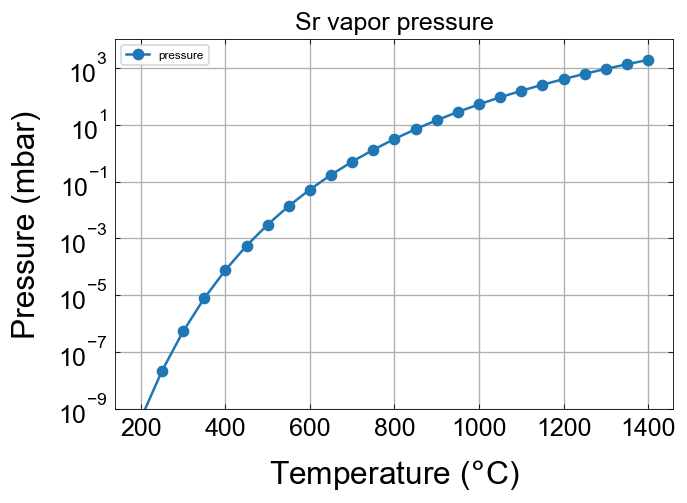

In [67]:
# from matplotlib.ticker import LogLocator

# Generate temperature values in degrees Celsius
t = np.linspace(200, 1400, 25)  # in degrees Celsius

# Convert to Kelvin
T = np.array([element + 273 for element in t])

# Calculate pressure
p = 10**(10.255 - 8324 / T) # p in Pa and T in Kelvin

P = np.array([element * 0.01 for element in p]) # in mbar

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
ax.plot(t, P, 'o-', label='pressure')

# Set axis labels
ax.set_xlabel(r'Temperature ($\degree$C)')
ax.set_ylabel('Pressure (mbar)')

# Set y-axis to logarithmic scale
ax.set_yscale('log')
ax.set_ylim(1e-9, 1e4)

# Set log scale ticks
#ax.yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10))

ax.set_title('Sr vapor pressure')

# Add legend
ax.legend()

# Show plot
plt.show()


## Velocity distribution of atomics beam from an effusive oven

The velocity distribution of the atomic beam from an effusive oven is given by the modified Maxwell-Boltzmann distribution 
$f(v) = 2\left(\dfrac{m}{2 k_B T}\right)^2 v^3 \exp\left({-\dfrac{mv^2}{2 K_B T}}\right)$

For 3D gas, MB velocity distribution is 
$f(v) = 4 \pi \left(\dfrac{m}{2 \pi k_B T}\right)^{3/2} v^2 \exp\left({-\dfrac{mv^2}{2 K_B T}}\right)$


Text(0, 0.5, 'Probability density')

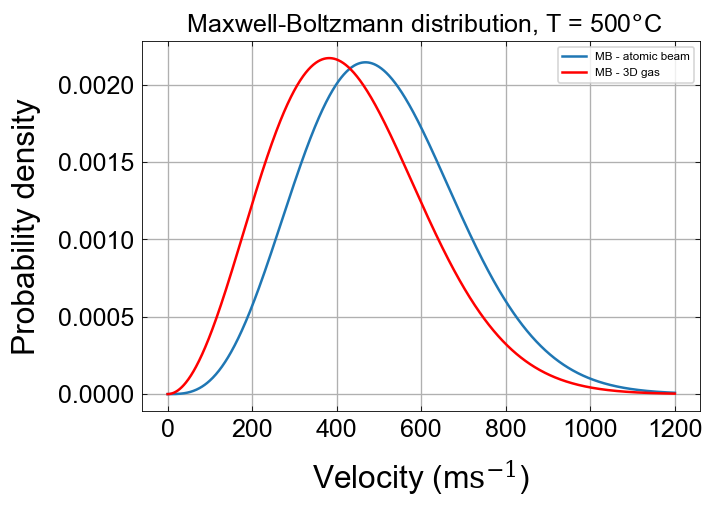

In [68]:
m = 88*u
T = 500+273 # in Kelvin

v = np.linspace(0,1200,1000)
f1 = 0.5 * (m/(kB*T))**2 * v**3 * np.exp(- m * v**2 / (2*kB*T)) # Modified M-B distribution for atomic beam
f2 = 4 * np.pi * (m/(2*np.pi*kB*T))**1.5 * v**2 * np.exp(- m * v**2 / (2*kB*T))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
ax.plot(v, f1, '-', label='MB - atomic beam')
ax.plot(v, f2, 'r-', label='MB - 3D gas')
ax.legend()

ax.set_title(r' Maxwell-Boltzmann distribution, T = 500$\degree$C')
ax.set_xlabel(r'Velocity (m$\rm s^{-1}$)')
ax.set_ylabel('Probability density')

## Velocities in a thermal atomic/molecular beam

Average velocity:$v_{ave} = \sqrt{\left(\dfrac{9\pi k_B T}{8m}\right)}$; 
Most probable velocity:$v_{mp} = \sqrt{\left(\dfrac{3 k_B T}{m}\right)}$; 
RMS velocity:$v_{rms} = \sqrt{\left(\dfrac{4 k_B T}{m}\right)}$

In [56]:
M = 88*u
t = 500 # in deg C
T = 500+273 # oven temp in Kelvin
α = np.sqrt(kB*T/M)
v_mp = np.sqrt(3)*α # most prob speed in a molecular beam
v_avg = np.sqrt(9*np.pi/8)*α # average speed in a molecular beam
v_rms = np.sqrt(4)*α # rms speed in a molecular beam

print('v_mp = ', round(v_mp,2), 'm/s')
print('v_avg = ', round(v_avg,2), 'm/s')
print('v_rms = ', round(v_rms,2), 'm/s')

v_mp =  468.09 m/s
v_avg =  508.06 m/s
v_rms =  540.5 m/s


## Velocities in a thermal gas (3D)

Average velocity:$v_{ave} = \sqrt{\left(\dfrac{8 k_B T}{\pi m}\right)}$; 
Most probable velocity:$v_{mp} = \sqrt{\left(\dfrac{2 k_B T}{m}\right)}$; 
RMS velocity:$v_{rms} = \sqrt{\left(\dfrac{3 k_B T}{m}\right)}$

In [59]:
M = 88*u
t = 500 # in deg C
T = 500+273 # oven temp in Kelvin
α = np.sqrt(kB*T/M)
v_mp = np.sqrt(2)*α # most prob speed in a molecular beam
v_avg = np.sqrt(8/np.pi)*α # average speed in a molecular beam
v_rms = np.sqrt(3)*α # rms speed in a molecular beam

print('v_mp = ', round(v_mp,2), 'm/s')
print('v_avg = ', round(v_avg,2), 'm/s')
print('v_rms = ', round(v_rms,2), 'm/s')

v_mp =  382.19 m/s
v_avg =  431.26 m/s
v_rms =  468.09 m/s


## Doppler shift due to atomic beam velocity

In [64]:
v_mp = 468 #most prob speed m/s
λ = 460.861 * 1e-9 

ΔD = v_mp / λ

print('Doppler shift = ', round(ΔD/1e9,3), 'GHz')


Doppler shift =  1.015 GHz


## Optical Molasses forces

## The force as a function of the velocity in the optical molasses technique (solid lines)

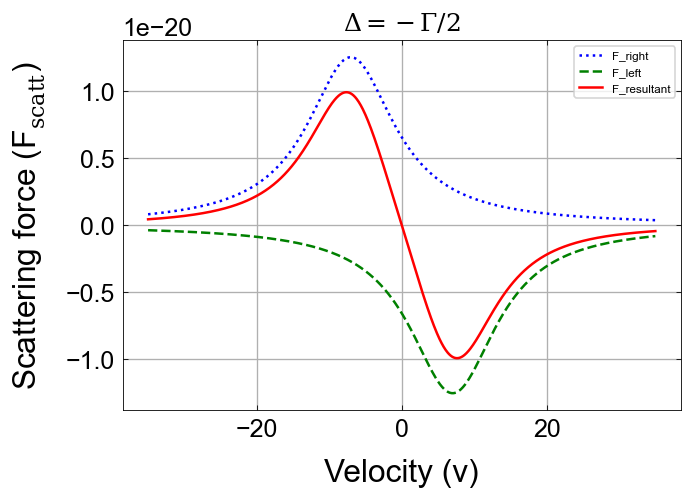

In [40]:
v = np.linspace(-35, 35, 1000)
λ = 460.861e-9  # 461 nm
k = 2 * np.pi / λ
Γ = 2 * np.pi * 30.5e6
s0 = 0.1
Δ = -Γ/2  # laser detuning (red)
hbar = ħ

F_right = 0.5 * hbar * k * Γ * s0 * 1 / (1 + s0 + 4 * ((Δ - k * v) ** 2 / Γ ** 2))
F_left = -0.5 * hbar * k * Γ * s0 * 1 / (1 + s0 + 4 * ((Δ + k * v) ** 2 / Γ ** 2))
F = F_right + F_left

fig, ax = plt.subplots(1,1, figsize=(6,4), dpi = 120)
ax.plot(v, F_right, 'b:', label='F_right')
ax.plot(v, F_left, 'g--', label='F_left')
ax.plot(v, F, 'r-', label='F_resultant')

ax.set_xlabel('Velocity (v)')
ax.set_ylabel(r'Scattering force (F$_{\rm scatt}$)')
ax.set_title(r'$\Delta = -\Gamma/2$')
ax.legend()



# plt.show()

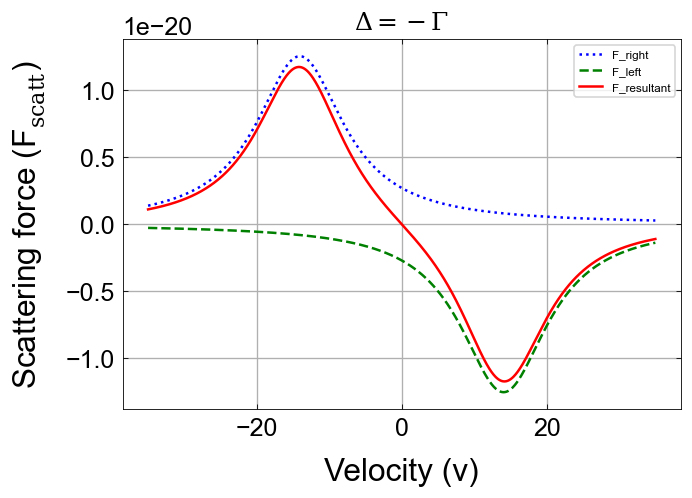

In [41]:
v = np.linspace(-35, 35, 1000)
λ = 460.861e-9  # 461 nm
k = 2 * np.pi / λ
Γ = 2 * np.pi * 30.5e6
s0 = 0.1
Δ = -Γ  # laser detuning (red)
hbar = ħ

F_right = 0.5 * hbar * k * Γ * s0 * 1 / (1 + s0 + 4 * ((Δ - k * v) ** 2 / Γ ** 2))
F_left = -0.5 * hbar * k * Γ * s0 * 1 / (1 + s0 + 4 * ((Δ + k * v) ** 2 / Γ ** 2))
F = F_right + F_left

fig, ax = plt.subplots(1,1, figsize=(6,4), dpi = 120)
ax.plot(v, F_right, 'b:', label='F_right')
ax.plot(v, F_left, 'g--', label='F_left')
ax.plot(v, F, 'r-', label='F_resultant')

ax.set_xlabel('Velocity (v)')
ax.set_ylabel(r'Scattering force (F$_{\rm scatt}$)')
ax.set_title(r'$\Delta = -\Gamma$')
ax.legend()

In [42]:
M = 88*u
T = 735*1e-6 # temp in Kelvin
α = np.sqrt(2*kB*T/M) # most prob speed in a vol of gas
v_m = np.sqrt(3/2)*α
print(v_m)

0.4564361709752913


## Dipole trapping calc of Na atoms 

Example 9.2 from C.J.Foot book

In [18]:
c = 299792458 # light vel in vacuum
λ = 1.060*1e-6 #1.06um
λ0 = 589*1e-9 # 589nm
t = 16*1e-9 # 16ns
Γ = 1/t
#Γ = 2*np.pi*9.7946*1e6 #in Hz (https://steck.us/alkalidata/sodiumnumbers.pdf)

ω0 = 2*np.pi*c/λ0
ω = 2*np.pi*c/λ
δ = (2*np.pi) * c * (1/λ0 - 1/λ) #detuning


print('δ/Γ = ', round(δ/Γ/1e7,3), 'X 10^7')
print('Γ = 2𝜋 X ', Γ/(2*np.pi)/1e6, 'MHz')
print('δ = 2𝜋 X ', δ/(2*np.pi)/1e12, 'THz')
print('ω0 = 2𝜋 X', ω0/(2*np.pi)/1e12, 'THz')
print('ω = 2𝜋 X', ω/(2*np.pi)/1e12, 'THz')
print('δ/ω0 = ', round(δ/ω0, 3))

δ/Γ =  2.274 X 10^7
Γ = 2𝜋 X  9.947183943243457 MHz
δ = 2𝜋 X  226.16242386840506 THz
ω0 = 2𝜋 X 508.9854974533107 THz
ω = 2𝜋 X 282.8230735849056 THz
δ/ω0 =  0.444


In [19]:
s = 1e8 # saturation param

U_dip = (ħ*Γ/8) * (Γ/δ) * s / kB # in Kelvin temp

R_sc = (Γ/8) * (Γ/δ)**2 * s # scattering rate


print('U_dip = ', U_dip*1e6, 'μK')
print('R_sc = ', R_sc)
print('R_sc = ', R_sc/Γ*2, ' X (Γ/2)')

U_dip =  262.45968770132345 μK
R_sc =  1.511295636096151
R_sc =  4.8361460355076833e-08  X (Γ/2)


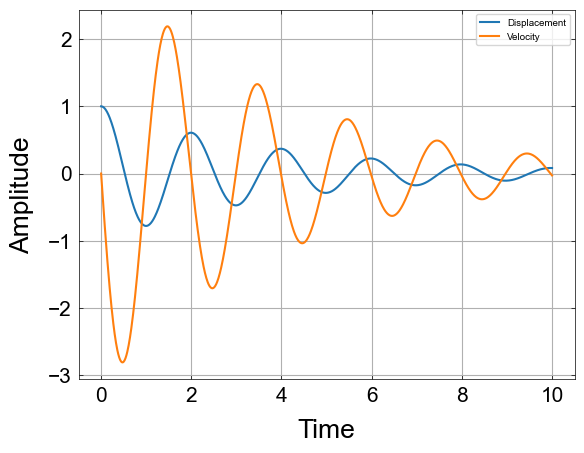

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Function that returns dz/dt
def model(z, t, m, c, k):
    x, v = z
    dxdt = v
    dvdt = -(c/m) * v - (k/m) * x
    return [dxdt, dvdt]

# System parameters
m = 1.0  # mass
c = 0.5  # damping coefficient
k = 10.0  # spring constant

# Initial conditions
x0 = 1.0  # initial displacement
v0 = 0.0  # initial velocity
z0 = [x0, v0]

# Time points
t = np.linspace(0, 10, 1000)

# Solve ODE
z = odeint(model, z0, t, args=(m, c, k))

# Extract displacement and velocity
x, v = z.T

# Plot results
plt.plot(t, x, label='Displacement')
plt.plot(t, v, label='Velocity')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



## GMOT location calc

In [3]:
λ_b = 460.8618 * 1e-9 
λ_r = 689.449 * 1e-9

m = 1
d = 770 * 1e-9  # grating period
dia = 20*1e-3 # collimated MOT beam diameter 25.4 mm
ρ = dia/2 # 1/e^2 beam radius

θ_b = np.arcsin(m*λ_b/d) * (180/np.pi)  # in degree
θ_r = np.arcsin(m*λ_r/d) * (180/np.pi)  # in degree

h_b = ρ * (1 / np.tan(θ_b*(np.pi/180)))  #BMOT capture volume height
h_r = ρ * (1 / np.tan(θ_r*(np.pi/180)))  #RMOT capture volume height

print('BMOT capture volume height = ', round((h_b*1000),3), 'mm')
print('RMOT capture volume height = ', round((h_r*1000),3), 'mm')

print('BMOT height = ', round((h_b*1000/2),3), 'mm')
print('RMOT height = ', round((h_r*1000/2),3), 'mm')

print('1st-order Bragg angle (θ_b) = ', round(θ_b, 2), 'degree')
print('1st-order Bragg angle (θ_r) = ', round(θ_r, 2), 'degree')

BMOT capture volume height =  13.385 mm
RMOT capture volume height =  4.973 mm
BMOT height =  6.692 mm
RMOT height =  2.487 mm
1st-order Bragg angle (θ_b) =  36.76 degree
1st-order Bragg angle (θ_r) =  63.56 degree


In [76]:
θ_r

63.55835084501994

In [30]:
## Calculate radiation pressure for blue and red light

In [60]:
θ = np.arcsin(0.707) * (180/np.pi)
print(θ)

44.991348337162016


In [52]:
f = 20*1e6
λ = c/f
print(λ/4)

3.747405725


In [62]:
np.sin(θ*(np.pi/180))

0.707

In [63]:
np.arcsin(0.707)

0.785247163395153

In [64]:
np.sin(0.785)

0.706825181105366

In [76]:
import numpy as np

# Define the quadratic function to be optimized
def quadratic_function(x):
    return x**2 + 2*x + 1

# Define the gradient of the quadratic function
def gradient(x):
    return 2*x + 2

# Gradient Descent Optimization
def gradient_descent(learning_rate, iterations):
    x = 0  # Initial guess
    for _ in range(iterations):
        x = x - learning_rate * gradient(x)
    
    return x

# Set hyperparameters
learning_rate = 0.1
iterations = 100

# Find the minimum using gradient descent
minimizer = gradient_descent(learning_rate, iterations)

# Print the result
print(f"Minimum value found at x = {minimizer}")
print(f"Function value at minimum: {quadratic_function(minimizer)}")


Minimum value found at x = -0.9999999997962964
Function value at minimum: 0.0


In [80]:
lamb = 689.000006*1e-9
nu = c/lamb
print(nu/1e12)

435.1124171107772


## Frequency uncertainty $\delta f = \dfrac{\delta t}{T}$

T : meaurement period; δt : time uncertainty

In [85]:
δt = 1 # 1ms
T = 60*60*1000 # [ms] measurement time is 1h 
δf = δt/T
print('δf = ', δf)

δf =  2.7777777777777776e-07


In [88]:
δt = 20 # 1ms
T = 24*60*60*1e9 # [ms] measurement time is 1h 
δf = δt/T
print('δf = ', δf)

δf =  2.3148148148148146e-13


In [45]:
0.39/57.50

0.006782608695652174

In [ ]:
just after pbs on p-path:3.217-1.650 mW
after qhp set to minimize on p-path: 0.83-4.4 angle: 332\
after qwp and hwp both minimized om p-path: 1-4 mW
now qwp fixed. 20-31, 23-38, 
angle = 8; variation: 8.9-15 mW

In [13]:
P = 64 #mW
d = 20*1e-1 # cm
area = np.pi*(d/2)**2
I = 2*P/(area)

print(I)

40.74366543152521


In [20]:
I_sat = 40 # mW/cm^2
I = 0.5*I_sat

P = 1*I*area

print(P)

62.83185307179586


In [22]:
d = 1.7
NA = 0.045
f = d/(2*NA)
print(f)

18.88888888888889
